<font size=5  color=#003366> <b>[LEPL1109] - STATISTICS AND DATA SCIENCES</b> <br><br> 
<b>Hackathon 03 - Clustering: Bias in sensitive datasets</b> </font> <br><br><br>

<font size=4  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Adrien Banse (adrien.banse@uclouvain.be)<br>
Jana Jovcheva (jana.jovcheva@uclouvain.be)<br>
François Lessage (francois.lessage@uclouvain.be)<br>
Sofiane Tanji (sofiane.tanji@uclouvain.be)<br>
<div style="text-align: right"> Version 2024-2025</div>
<br><br>
<div class="alert alert-danger">
<b>[IMPORTANT] Read all the documentation</b>  <br>
    Make sure that you read the whole notebook, <b>and</b> the <code>README.md</code> file in the folder.
</div>
<br><br>
</font>

# **Guidelines and Deliverables**

*   This hackathon is due on the **22 December 2024 at 22h00**
*   Copying code or answers from other groups (or from the internet) is strictly forbidden. <b>Each source of inspiration (stack overflow, git, other groups, ChatGPT...) must be clearly indicated!</b>
*  This notebook (with the "ipynb" extension) file, the report (PDF format) and all other files that are necessary to run your code must be delivered on <b>Moodle</b>.
* Only the PDF report and the python source file will be graded, both on their content and the quality of the text / figures.
  * 5/10 for the code.
  * 4/10 for the Latex report.
  * 1/10 for the visualization. <br><br>

<div class="alert alert-info">
<b>[DELIVERABLE] Summary</b>  <br>
After the reading of this document (and playing with the code!), we expect you to provide us with:
<ol>
   <li> a PDF file (written in LaTeX) that answers all the questions below. The report should contain high quality figures with named axes (we recommend saving plots with the <samp>.pdf</samp> extension);
   <li> this Jupyter Notebook (it will be read, checked for plagiarism and evaluated);
   <li> and all other files we would need to run your code.
</ol>
</div>

As mentioned above, plagiarism is forbidden. However, we cannot forbid you to use artificial intelligence BUT we remind you that the aim of this project is to learn on your own and with the help of the course material. Finally, we remind you that for the same question, artificial intelligence presents similar solutions, which could be perceived as a form of plagiarism.

# **Context & Objective**

## Context

Predictive algorithms serve multiple functions in criminal justice. They forecast crime locations, identify potential violent offenders, predict court appearance compliance, and estimate recidivism risk. 
COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) stands as a prominent risk assessment tool. Since 1998, the COMPAS risk score has been used by many jurisdictions in the United States to assess risk of recidivism in pre-trial bail decisions.
In the United States, a defendant may either be detained or released on bail *(sous caution)* prior to the trial in court depending on various factors. Judges may detain defendants or increase the bail amount based on the risk score provided by the COMPAS algorithm.


In 2016, investigative journalists at ProPublica published [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing), highlighting significant biases in the COMPAS Algorithm. Specifically, they showed that the proportion of false positives for African-American defendants is significantly higher than for Caucasian defendants. In other words, more African-American were labeled high risk and ended up not relapsing into criminal behaviour than Caucasian defendants. A more thorough explanation of their data analysis procedure can be found in their companion article [How We Analyzed the COMPAS Recidivism Algorithm](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm).

The COMPAS algorithm is proprietary software. What is known is that its decision is based on the answers to a questionnaire with 137 questions which the defendant must fill. There are questions related to crime (“How many prior juvenile felony offense arrests?”) along with seemingly mundane ones (“Do you live with friends?”; “Do you feel discouraged at times?”).

In this hackathon, you are provided a dataset with a subset of answers to that questionnaire from more than 7000 defendants living in Broward County, Florida as well as whether they did relapse into criminal behaviour or not.

## Objective(s)
It has been shown in the article linked above that the COMPAS algorithm is biased. We take this for granted and we do not bother to show it again. The main objective of the hackathon for you is to understand that it is not only the COMPAS algorithm that is biased, but that **the data itself is biased**, in the sense that one can find structural patterns of discrimination embedded in the data. In other words, *learning from data coming from a biased world without precautions will necessarily lead to biased predictions*. Knowing which precautions one should take to avoid biased predictions is a whole subfield of machine learning called "Fairness in AI". It is out of the scope of this hackathon and out of the scope of LEPL1109. If you are curious about it however, a great resource is the following book [Fairness and machine learning Limitations and Opportunities](https://fairmlbook.org/).

To see that the data itself is biased, you will implement your own recidivism prediction algorithms and measure their fairness.

## Dataset description
A large part of this hackathon will be devoted to handling, understanding and manipulating the dataset. The dataset provided represents 7214 defendants (data points) with 49 answers to the questionnaire (features) for each defendant. This is a lot of features and it should take you some time to understand them before going through Part 1. This data processing part may be tiresome but it is a necessary task in any serious data project.
A description of the features is provided in the table below:

| Feature               | Description                                                                                      |
|-----------------------|--------------------------------------------------------------------------------------------------|
| name                  | Full name of the defendant                                                                       |
| first                 | First name of the defendant                                                                      |
| last                  | Last name of the defendant                                                                       |
| compas_screening_date | The date the defendant filled the questionnaire                                                  |
| sex                   | Sex of the defendant (Female, Male)                                                              |
| dob                   | Date of birth of the defendant (YYYY-MM-DD)                                                      |
| age                   | Age of the defendant                                                                             |
| age_cat               | Age category of the defendant (Less than 25, 25-45, Greater than 45)                             |
| race                  | race attribute (African-American, Caucasian, Hispanic, Asian, Native American, Other)       |
| juv_fel_count         | Number of juvenile felonies committed by the defendant                                           |
| decile_score          | Decile of the COMPAS score                                                                       |
| juv_misd_count        | Number of juvenile misdemeanors                                                                  |
| juv_other_count       | Number of juvenile convictions that are not considered misdemeanors nor felonies                 |
| priors_count          | Number of prior crimes committed                                                                 |
| days_b_screening_arrest | Count of days between screening date and (original) arrest date                                |
| c_jail_in             | Datetime at which the defendant entered jail (YYYY-MM-DD, hh:mm:ss)                              |
| c_jail_out            | Datetime at which the defendant left jail (YYYY-MM-DD, hh:mm:ss)                                 |
| c_case_number         | Case number for the current charge                                                               |
| c_offense_date        | Date the offense was committed (YYYY-MM-DD)                                                      |
| c_arrest_date         | Date the offense was arrested (YYYY-MM-DD)                                                       |
| c_days_from_compas    | Days from COMPAS screening date to current arrest date                                           |
| c_charge_degree       | Current charge degree (felony or misdemeanor) at the time of filling the questionnaire ("F", "M")|
| c_charge_desc         | Description of the current charge                                                                |
| is_recid              | Binary variable indicating whether the defendant is rearrested at any time (0, 1)                |
| r_case_number         | Case number for a recidivism charge                                                              |
| r_charge_degree       | Recidivism charge degree (felony or misdemeanor) for an offense subsequent to filling the questionnaire |
| r_days_from_arrest    | Days from Arrest to Recidivism Event                                                             |
| r_offense_date        | Date the recidivism offense was committed (YYYY-MM-DD)                                           |
| r_charge_desc         | Description of the recidivism charge                                                             |
| r_jail_in             | Datetime at which the defendant entered jail for a recidivism charge (YYYY-MM-DD, hh:mm:ss)      |
| r_jail_out            | Datetime at which the defendant left jail for a recidivism charge (YYYY-MM-DD, hh:mm:ss)         |
| violent_recid         | Number of violent recidivism events                                                              |
| is_violent_recid      | Binary variable indicating whether the defendant committed a violent recidivism (0, 1)           |
| vr_case_number        | Case number for a violent recidivism charge                                                      |
| vr_charge_degree      | Violent recidivism charge degree (felony or misdemeanor)                                         |
| vr_offense_date       | Date the violent recidivism offense was committed (YYYY-MM-DD)                                   |
| vr_charge_desc        | Description of the violent recidivism charge                                                     |
| type_of_assessment    | Type of COMPAS assessment performed                                                              |
| decile_score.1        | *Same as decile_score*                                                                           |
| score_text            | Recidivism risk of the defendant (Low, Medium, High)                                             |
| screening_date        | Date on which the defendant was screened (YYYY-MM-DD)                                            |
| v_type_of_assessment  | Type of violent risk assessment                                                                  |
| v_decile_score        | Decile score for violent risk assessment                                                         |
| v_score_text          | Violent recidivism risk of the defendant (Low, Medium, High)                                     |
| v_screening_date      | Date of the violent risk assessment (YYYY-MM-DD)                                                 |
| in_custody            | Date on which the defendant was placed in custody (YYYY-MM-DD)                                   |
| out_custody           | Date on which the defendant left custody (YYYY-MM-DD)                                            |
| priors_count.1        | *Same as priors_count*                                                                           |
| two_year_recid        | Binary variable on whether the defendant has recidivated within two years (0, 1)                 |

## **Notebook structure**

### PART 1 - Data preprocessing
   #### 1.1 - Importing the packages
   #### 1.2 - Importing the dataset
   #### 1.3 - Dataset curation
   #### 1.4 - Feature engineering
   #### 1.5 - Sensitive features
   #### 1.6 - Scale the dataset

### PART 2 - Data exploration
   #### 2.1 - Feature visualization
   #### 2.2 - Principal Component Analysis

   
### PART 3 - Clustering
   #### 3.1 - K-Means
   #### 3.2 - Results Analysis


### PART 4 - Validation and fairness metrics
   #### 4.1 - Silhouette score
   #### 4.2 - Purity and entropy of a clustering
   #### 4.3 - Precision and Recall per race group
   #### 4.4 - Select the number of clusters


### PART 5 - Visualization
   #### 5.1 - Visualize your results

<br><br>

***Remark***

We filled this notebook with preliminary (trivial) code. This practice makes possible to run each cell, even the last ones, without throwing warnings once the dataset is imported. <b>Take advantage of this aspect to divide the work between all team members!</b> <br><br>
Remember that many libraries exist in Python, so many functions have already been developed. Read the documentation and don't reinvent the wheel! You can import whatever you want.

<br><font size=7 color=#009999> <b>PART I - Preliminaries</b> </font> <br><br>

<font size=5 color=#009999> <b>1.1 - Importing the packages</b> <br>
</font>


In [62]:
"""
CELL N°1.1 : IMPORTING ALL THE NECESSARY PACKAGES

@pre:  /
@post: The necessary packages should be loaded.
"""

import warnings
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

random_seed = 42

np.random.seed(random_seed)
random.seed(random_seed)

warnings.filterwarnings("ignore")

# Import all the necessary packages here...


<br>
<font size=5 color=#009999> <b>1.2 - Importing the dataset</b> <br>
</font>


In [63]:
# """
# CELL N°1.2 : IMPORTING THE DATASET

# @pre:  /
# @post: The object df should contain a Pandas DataFrame corresponding to the file compas-dataset.csv.
# """

import pandas as pd

# # Importer le fichier CSV
file_path = 'compas-dataset.csv'  # Remplacez par le chemin exact si nécessaire
df = pd.read_csv(file_path)

# Afficher les informations de base sur le dataset
df.info()

# Aperçu des premières lignes
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     7214 non-null   object 
 1   first                    7214 non-null   object 
 2   last                     7214 non-null   object 
 3   compas_screening_date    7214 non-null   object 
 4   sex                      7214 non-null   object 
 5   dob                      7214 non-null   object 
 6   age                      7214 non-null   int64  
 7   age_cat                  7214 non-null   object 
 8   race                     7214 non-null   object 
 9   juv_fel_count            7214 non-null   int64  
 10  decile_score             7214 non-null   int64  
 11  juv_misd_count           7214 non-null   int64  
 12  juv_other_count          7214 non-null   int64  
 13  priors_count             7214 non-null   int64  
 14  days_b_screening_arrest 

<br>
<font size=5 color=#009999> <b>1.3 - Dataset curation</b> <br>
</font>

For this hackathon, your goal is to **determine the risk of recidivism of an individual**. Therefore, you should be able to determine which features are useful for your application and remove the unnecessary ones. We provide a list of features to keep and ask you to add features to that list. This step may take more time than the others. It is important to carefully analyze each feature and its relevance for our goal.

In this data cleaning task, you must remove redundant features, features that are not quantifiable and features that you believe are not linked to risk of recidivism. Yous should neither limit yourself to the provided list which is too short nor add all numeric features.
You should also avoid data leakage. Except for the "two_year_recid" feature, do not keep features which represent true recidivism. For similar reasons, do not keep features linked to the predictions made by the COMPAS algorithm. Using predictions made by a supervised algorithm (which is trained using both the features matrix and the target variable) is effectively leaking information from the target variable.

<div class="alert alert-warning">
<b>[Question 1.1] Removing unnecessary features </b>  <br>
Can you already, a priori, detect that some features are useless?
<ol>
   <li> if yes, list those (useless) features and explain your choice;
   <li> if not, then explain why it is better to wait.
</ol>
    Generally speaking, is it a good idea to remove a feature based on <i>a priori</i> knowledge, or doesn't it alter the final outcome?
</div>

In [64]:
"""
CELL N°1.3.1 : CURATION OF THE DATASET

@pre:  A pandas.DataFrame df containing the dataset
@post: A pandas.DataFrame df containing the dataset without outliers and with necessary features only
"""

# Suppression des lignes correspondant à des cas particuliers ou des données de mauvaise qualité
df = df[
    (
        df["is_recid"] != -1
    )  # Data aggregator encoded is_recid = -1 whenever they couldn't find a COMPAS case.
    & (
        df["days_b_screening_arrest"] <= 30
    )  # More than 30 days between the day of arrest and the date when the questionnaire was filled => poor data quality
    & (df["days_b_screening_arrest"] >= -30)  # Same as above
    & (
        df["c_charge_degree"] != "O"
    )  # These are simple traffic offenses, they will never be charged with jail.
]

# Liste des colonnes à conserver
columns_to_keep = [
    "sex",
    "age",
    "race",
    "juv_fel_count",
    "juv_misd_count",
    "juv_other_count",
    "priors_count",
    "c_jail_in",
    "c_jail_out",
    "c_charge_degree",
    "in_custody",
    "out_custody",
    "two_year_recid",
    "compas_screening_date", 
    "c_offense_date", 
    "c_arrest_date",
    "type_of_assessment",
    "v_type_of_assessment", 
    "screening_date",
    "v_screening_date"
]

# Création d'un DataFrame ne contenant que ces colonnes
df = df[columns_to_keep]

# Vérification de la structure du DataFrame après la sélection
print(df.info())
df.describe(include="all")

# Remarque : on aimerait retirer, mais pas surs de comment justifier a ce stade :
# 'days_b_screening_arrest', 'c_days_from_compas'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7213
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sex                    6172 non-null   object
 1   age                    6172 non-null   int64 
 2   race                   6172 non-null   object
 3   juv_fel_count          6172 non-null   int64 
 4   juv_misd_count         6172 non-null   int64 
 5   juv_other_count        6172 non-null   int64 
 6   priors_count           6172 non-null   int64 
 7   c_jail_in              6172 non-null   object
 8   c_jail_out             6172 non-null   object
 9   c_charge_degree        6172 non-null   object
 10  in_custody             6172 non-null   object
 11  out_custody            6172 non-null   object
 12  two_year_recid         6172 non-null   int64 
 13  compas_screening_date  6172 non-null   object
 14  c_offense_date         5388 non-null   object
 15  c_arrest_date        

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,c_charge_degree,in_custody,out_custody,two_year_recid,compas_screening_date,c_offense_date,c_arrest_date,type_of_assessment,v_type_of_assessment,screening_date,v_screening_date
count,6172,6172.000000,6172,6172.000000,6172.000000,6172.000000,6172.000000,6172,6172,6172,6172,6172,6172.000000,6172,5388,784,6172,6172,6172,6172
unique,2,NaN,6,NaN,NaN,NaN,NaN,702,760,2,1087,1097,NaN,685,736,416,1,1,685,685
top,Male,NaN,African-American,NaN,NaN,NaN,NaN,2013-02-22,2013-02-15,F,2013-01-27,2020-01-01,NaN,2013-04-20,2013-01-14,2013-02-06,Risk of Recidivism,Risk of Violence,2013-04-20,2013-04-20
freq,4997,NaN,3175,NaN,NaN,NaN,NaN,31,29,3970,19,46,NaN,30,24,8,6172,6172,30,30
mean,NaN,34.534511,NaN,0.059300,0.091218,0.110661,3.246436,NaN,NaN,NaN,NaN,NaN,0.455120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,11.730938,NaN,0.463599,0.497872,0.470731,4.743770,NaN,NaN,NaN,NaN,NaN,0.498022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,25.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,42.000000,NaN,0.000000,0.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In data science, datasets are rarely tailored to specific applications. Instead, they typically originate from information collected over a certain period. It is the data scientist's responsibility to effectively utilize these datasets.

<div class="alert alert-info">
<b>[Remark 1.1]</b><br>
In most real-world cases, the datasets you work with will contain artifacts like typos or missing data, which may need to be removed before using them in algorithms. In Pandas, missing data is represented as "NaNs" (Not a Number), though it applies to all missing objects, not just numbers.
</div>

Can you find a way to inspect your dataset and see if there are some missing data?

In [65]:
"""
CELL N°1.3.2: INFORMATION ABOUT TYPES AND NANs
@pre:  A pandas.DataFrame df containing the dataset.
@post: Statistics and/or visualization on the presence of missing data in df.
"""
# Calcul du nombre de valeurs manquantes et du pourcentage de NaNs par colonne
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().mean()) * 100

# Création d'un tableau combinant le nombre de NaNs et le pourcentage de NaNs
missing_info = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})


# Affichage du tableau
print(missing_info)

                       Missing Values  Percentage
sex                                 0    0.000000
age                                 0    0.000000
race                                0    0.000000
juv_fel_count                       0    0.000000
juv_misd_count                      0    0.000000
juv_other_count                     0    0.000000
priors_count                        0    0.000000
c_jail_in                           0    0.000000
c_jail_out                          0    0.000000
c_charge_degree                     0    0.000000
in_custody                          0    0.000000
out_custody                         0    0.000000
two_year_recid                      0    0.000000
compas_screening_date               0    0.000000
c_offense_date                    784   12.702528
c_arrest_date                    5388   87.297472
type_of_assessment                  0    0.000000
v_type_of_assessment                0    0.000000
screening_date                      0    0.000000


<div class="alert alert-info">
<b>[Remark 1.2] Each problem has its own solution</b> <br>
There exist numerous ways to deal with missing information and we will discuss the two main approaches:
<ol>
   <li> you remove rows or columns that contain missing data;
   <li> or you replace NaNs with another value. The latter can be a fixed value or computed to be, e.g., the mean of all non-NaNs values. The topic of replacing missing data, also called imputation of missing values, is very broad and complex, and there is no global solution that applies everywhere. Maybe you can find one that works well here?
</ol>
    
You **should** read more about how to imput missing value [here](https://scikit-learn.org/stable/modules/impute.html). However, you will not be evaluated on how sophisticated your handling of NaNs is so, for this hackathon, do not spend an unreasonable amount of time on the next cell.
</div> 

<div class="alert alert-warning">
<b>[Question 1.2] Handling missing data </b>  <br>
Given the dataset and the amount / type of missing information, what strategy do you propose to follow regarding missing data (NaNs)? <br> You can choose one or many of the following:
<ol>
   <li> drop features (column) with missing information; 
   <li> drop samples (row) with missing information;
   <li> replace missing information with interpolation / extrapolation / simple substitution / ...
</ol>
Justify briefly your choice.
</div> 

In [66]:
"""
CELL N°1.3.3: Handling missing values
@pre:  A pandas.DataFrame df containing the dataset.
@post: A pandas.DataFrame df containing the dataset with no missing values.
"""


threshold = 0.8  # 80%
na_percentage = df.isna().mean()

# Filtrer les colonnes qui ont moins de 80% de NaN
columns_to_keep = na_percentage[na_percentage < threshold].index

# Suppression des lignes contenant des NaNs
df = df[columns_to_keep]

df = df.dropna()

# Vérification après suppression
print(df.info())

df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5388 entries, 0 to 7213
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sex                    5388 non-null   object
 1   age                    5388 non-null   int64 
 2   race                   5388 non-null   object
 3   juv_fel_count          5388 non-null   int64 
 4   juv_misd_count         5388 non-null   int64 
 5   juv_other_count        5388 non-null   int64 
 6   priors_count           5388 non-null   int64 
 7   c_jail_in              5388 non-null   object
 8   c_jail_out             5388 non-null   object
 9   c_charge_degree        5388 non-null   object
 10  in_custody             5388 non-null   object
 11  out_custody            5388 non-null   object
 12  two_year_recid         5388 non-null   int64 
 13  compas_screening_date  5388 non-null   object
 14  c_offense_date         5388 non-null   object
 15  type_of_assessment   

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_jail_in,c_jail_out,c_charge_degree,in_custody,out_custody,two_year_recid,compas_screening_date,c_offense_date,type_of_assessment,v_type_of_assessment,screening_date,v_screening_date
count,5388,5388.000000,5388,5388.000000,5388.000000,5388.000000,5388.000000,5388,5388,5388,5388,5388,5388.000000,5388,5388,5388,5388,5388,5388
unique,2,NaN,6,NaN,NaN,NaN,NaN,687,746,2,1057,1070,NaN,678,736,1,1,678,678
top,Male,NaN,African-American,NaN,NaN,NaN,NaN,2013-02-22,2013-04-30,F,2013-11-12,2020-01-01,NaN,2013-04-20,2013-01-14,Risk of Recidivism,Risk of Violence,2013-04-20,2013-04-20
freq,4351,NaN,2717,NaN,NaN,NaN,NaN,25,24,3299,17,35,NaN,25,24,5388,5388,25,25
mean,NaN,34.531366,NaN,0.049183,0.085746,0.112101,3.048998,NaN,NaN,NaN,NaN,NaN,0.455642,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,11.764565,NaN,0.373119,0.482934,0.474775,4.664760,NaN,NaN,NaN,NaN,NaN,0.498075,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,25.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,31.000000,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,42.000000,NaN,0.000000,0.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


<br>
<font size=5 color=#009999> <b>1.4 - Feature engineering</b> <br>
</font>

<div class="alert alert-info">
<b>[Remark 1.3] New features extraction</b> <br>
In the present case, some features in the dataset still need to be reworked in order to provide meaningful information. For example, working with datetimes might not be easy.
</div>

You may want to somehow incorporate the information about date and time into the dataset in a more **intelligent** manner than it was before. Again, there can be multiple solutions, and we will propose you a very simple one.

For example, what is most important to predict the likelihood of recidivism: the exact dates at which each defendant entered and left jail/custody or the time spent in jail/custody?

Note: 1) you should apply your solution to all the "date/time" features you kept. There should at least be the one hinted above. 2) Pandas has a to_datetime function that should prove useful !

In [67]:
"""
CELL N°1.4 : FEATURE ENGINEERING

@pre:  A pandas.DataFrame df containing the dataset
@post: A pandas.DataFrame df containing the previous dataset with the new features you created.
"""

# Convertir les colonnes datetime en objets datetime (si ce n'est pas déjà fait)
df['c_jail_in'] = pd.to_datetime(df['c_jail_in'], errors='coerce')
df['c_jail_out'] = pd.to_datetime(df['c_jail_out'], errors='coerce')
df['in_custody'] = pd.to_datetime(df['in_custody'], errors='coerce')
df['out_custody'] = pd.to_datetime(df['out_custody'], errors='coerce')

# Calculer le nombre de jours passés en prison (c_jail_in à c_jail_out)
df['days_in_jail'] = (df['c_jail_out'] - df['c_jail_in']).dt.days.astype(int)

# Calculer le nombre de jours passés en garde à vue (in_custody à out_custody)
df['days_in_custody'] = (df['out_custody'] - df['in_custody']).dt.days.astype(int)

# Remplacer les valeurs NaN (si la date de sortie est manquante, cela signifie que la personne est toujours en garde à vue)
df['days_in_jail'].fillna(0, inplace=True)
df['days_in_custody'].fillna(0, inplace=True)

# Vérification des nouvelles colonnes ajoutées
df[['c_jail_in', 'c_jail_out', 'days_in_jail', 'in_custody', 'out_custody', 'days_in_custody']].head()

# Supprimer les colonnes (maintenant) inutiles
df.drop(columns='c_jail_in', inplace=True)
df.drop(columns='c_jail_out', inplace=True)
df.drop(columns='in_custody', inplace=True)
df.drop(columns='out_custody', inplace=True)


# Mapper les données qualitatives -> quantitatives
c_charge_degree_map = {
    "M" : 0,
    "F" : 1,
}
df['c_charge_degree'] = df['c_charge_degree'].map(c_charge_degree_map)



v_type_of_assessment_map = {
    "Risk of Violence" : 1,
}

df['v_type_of_assessment'] = df['v_type_of_assessment'].map(v_type_of_assessment_map)

type_of_assessment_map = {
    "Risk of Recidivism" : 1,
}

df['type_of_assessment'] = df['type_of_assessment'].map(type_of_assessment_map)

# Infos
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5388 entries, 0 to 7213
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   sex                    5388 non-null   object
 1   age                    5388 non-null   int64 
 2   race                   5388 non-null   object
 3   juv_fel_count          5388 non-null   int64 
 4   juv_misd_count         5388 non-null   int64 
 5   juv_other_count        5388 non-null   int64 
 6   priors_count           5388 non-null   int64 
 7   c_charge_degree        5388 non-null   int64 
 8   two_year_recid         5388 non-null   int64 
 9   compas_screening_date  5388 non-null   object
 10  c_offense_date         5388 non-null   object
 11  type_of_assessment     5388 non-null   int64 
 12  v_type_of_assessment   5388 non-null   int64 
 13  screening_date         5388 non-null   object
 14  v_screening_date       5388 non-null   object
 15  days_in_jail         

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid,compas_screening_date,c_offense_date,type_of_assessment,v_type_of_assessment,screening_date,v_screening_date,days_in_jail,days_in_custody
count,5388,5388.000000,5388,5388.000000,5388.000000,5388.000000,5388.000000,5388.000000,5388.000000,5388,5388,5388.0,5388.0,5388,5388,5388.000000,5388.000000
unique,2,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,678,736,NaN,NaN,678,678,NaN,NaN
top,Male,NaN,African-American,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-20,2013-01-14,NaN,NaN,2013-04-20,2013-04-20,NaN,NaN
freq,4351,NaN,2717,NaN,NaN,NaN,NaN,NaN,NaN,25,24,NaN,NaN,25,25,NaN,NaN
mean,NaN,34.531366,NaN,0.049183,0.085746,0.112101,3.048998,0.612287,0.455642,NaN,NaN,1.0,1.0,NaN,NaN,13.452858,33.182442
std,NaN,11.764565,NaN,0.373119,0.482934,0.474775,4.664760,0.487274,0.498075,NaN,NaN,0.0,0.0,NaN,NaN,42.930678,169.105520
min,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.0,1.0,NaN,NaN,0.000000,0.000000
25%,NaN,25.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.0,1.0,NaN,NaN,1.000000,1.000000
50%,NaN,31.000000,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,NaN,1.0,1.0,NaN,NaN,1.000000,2.000000
75%,NaN,42.000000,NaN,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,NaN,NaN,1.0,1.0,NaN,NaN,5.000000,15.000000


We notice that the two features "type_of_assessment" and "v_type_of_assessment" have everywhere the same value : 1.
As the type of assessment is alwyas "Risk of recidivism" and the violence type of assessment is always "Risk of violence", these two features do not add anything to the sample. We delete these features.


In [68]:
df.drop(columns=["type_of_assessment"],inplace=True)
df.drop(columns=["v_type_of_assessment"],inplace=True)

<div class="alert alert-warning">
<b>[Question 1.3] New features </b>  <br>
What features have you added? If a particular manipulation has been applied, please explain.
</div> 

<br>
<font size=5 color=#009999> <b>1.5 - Sensitive features</b> <br>
</font>
<br>

<div class="alert alert-info">
<b>[Remark 1.4] Sensitive features</b> <br>
At this stage of the Hackathon, you still have two sensitive features, the sex attribute and the race attribute. As the end goal is to build a fair learning algorithm, you should not reasonably use these two features to determine if there is a risk of recidivism of the defendant.
</div>

To check if your learning techniques are unfair to particular subgroups of these features, you should **remove both features from the dataset while keeping them aside** to analyze the fairness of our learning techniques.

In [69]:
"""
CELL N°1.5 : SENSITIVE FEATURES

@pre:  A pandas.DataFrame df containing the dataset with sensitive features
@post: A pandas.DataFrame df containing the dataset without sensitive features and separate numpy arrays for each sensitive feature (race and sex)
as well as the true label array y.
"""

df2 = df.copy()


# Use the dictionaries below to encode numerically the sensitive features.
race_map = {
    "African-American": 0,
    "Caucasian": 1,
    "Asian": 2,
    "Other": 3,
    "Hispanic": 4,
    "Native American": 5,
}

df2['race'] = df2['race'].map(race_map) 
race = np.array([race_map[r] for r in df['race']])
df.drop(columns=['race'], inplace=True)


sex_map = {"Male": 0, "Female": 1}
df2['sex'] = df2['sex'].map(sex_map)
sex = np.array([sex_map[s] for s in df['sex']])
df = df.drop(columns=['sex'])

# As you approach the last step of the preprocessing, you should also store the target variable and remove it from the dataframe.
# It is good practice to remove it just before the scaling so that its dimension corresponds to the number of data points in df.
y = df["two_year_recid"].astype(float).values
df.drop(columns=["two_year_recid"], inplace=True)
df2.drop(columns=["two_year_recid"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5388 entries, 0 to 7213
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    5388 non-null   int64 
 1   juv_fel_count          5388 non-null   int64 
 2   juv_misd_count         5388 non-null   int64 
 3   juv_other_count        5388 non-null   int64 
 4   priors_count           5388 non-null   int64 
 5   c_charge_degree        5388 non-null   int64 
 6   compas_screening_date  5388 non-null   object
 7   c_offense_date         5388 non-null   object
 8   screening_date         5388 non-null   object
 9   v_screening_date       5388 non-null   object
 10  days_in_jail           5388 non-null   int32 
 11  days_in_custody        5388 non-null   int32 
dtypes: int32(2), int64(6), object(4)
memory usage: 505.1+ KB


<br>
<font size=5 color=#009999> <b>1.6 - Scaling the dataset</b> <br>
</font>

***Standardizing*** is important when you work with data because it allows data to be compared with one another.

$z$ is the standard score of a population $x$. It can be computed as follows:
$$z = \frac{x-\mu}{\sigma}$$
with $\mu$ the mean of the population and $\sigma$ the standard deviation of the population.

Please consult [Wikipedia](https://en.wikipedia.org/wiki/Standard_score) for further information about the standardization.\
Be careful to use the same formula as us, check in `scikit-learn` and check the already existing imports.

In [70]:
"""
CELL N°1.6 : SCALE THE DATASET

@pre:  A pandas.DataFrame df containing the dataset
@post: A pandas.DataFrame df containing the standardized dataset
"""

# We decided to definitely remove date features before the scaling : 

to_remove = ['compas_screening_date', 'c_offense_date', 'screening_date',
'v_screening_date']

df = df.drop(columns=to_remove)
df2 = df2.drop(columns=to_remove)


from sklearn.preprocessing import StandardScaler

def scale_dataset(df):
    
    # Initialiser le scaler
    scaler = StandardScaler()
    
    # Appliquer le scaler sur les colonnes numériques
    df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    
    return df

# Appliquer la mise à l'échelle
df = scale_dataset(df)
df2 = scale_dataset(df2)

# Afficher des informations après la normalisation
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5388 entries, 0 to 5387
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              5388 non-null   float64
 1   juv_fel_count    5388 non-null   float64
 2   juv_misd_count   5388 non-null   float64
 3   juv_other_count  5388 non-null   float64
 4   priors_count     5388 non-null   float64
 5   c_charge_degree  5388 non-null   float64
 6   days_in_jail     5388 non-null   float64
 7   days_in_custody  5388 non-null   float64
dtypes: float64(8)
memory usage: 336.9 KB


,age,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,days_in_jail,days_in_custody
count,5.388000e+03,5.388000e+03,5.388000e+03,5.388000e+03,5.388000e+03,5.388000e+03,5.388000e+03,5.388000e+03
mean,-3.729591e-17,-4.639941e-16,1.250031e-16,-2.489141e-16,-8.416307e-17,5.803532e-16,1.644008e-16,-1.796025e-16
std,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00
min,-1.320304e+00,-1.318291e-01,-1.775688e-01,-2.361358e-01,-6.536843e-01,-1.256672e+00,-3.133914e-01,-1.962415e-01
25%,-8.102510e-01,-1.318291e-01,-1.775688e-01,-2.361358e-01,-6.536843e-01,-1.256672e+00,-2.900959e-01,-1.903275e-01
50%,-3.001976e-01,-1.318291e-01,-1.775688e-01,-2.361358e-01,-4.392911e-01,7.957526e-01,-2.900959e-01,-1.844135e-01
75%,6.349004e-01,-1.318291e-01,-1.775688e-01,-2.361358e-01,2.038884e-01,7.957526e-01,-1.969138e-01,-1.075313e-01
max,5.225381e+00,2.667176e+01,2.674371e+01,1.872197e+01,7.493256e+00,7.957526e-01,1.713496e+01,3.549485e+01


<br><font size=7 color=#009999> <b>PART 2 - Data Exploration</b> </font> <br><br>

<font size=5 color=#009999> <b>2.1 - Feature visualization</b> <br>
</font>


### Is the dataset balanced in terms of sensitive groups ?
It's good practice to check this to better understand the contents of our dataset.
Indeed, if the training dataset is severely imbalanced, our learning algorithm may perform better for over-represented groups than for under-represented groups. Moreover, our goal is for the model to perform equally well across all groups.

<div class="alert alert-warning">
<b>[Question 2.1] (Im)Balanced dataset ? </b>  <br>
Is the dataset imbalanced ? What could be the consequences in terms of fairness i.e. in terms of the model performing equally well across all groups ?
</div> 

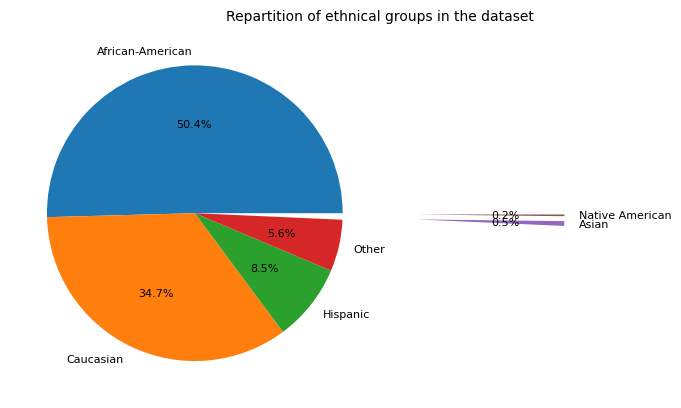

In [71]:
"""
CELL N°2.1.1: (Im)Balanced dataset ?

@pre:  A pandas.DataFrame `X` containing the dataset
@post: A pie chart plot representing the repartition of race groups in the dataset.
"""
import pandas as pd
pd.Series.plot
X = df
X2 = df2

def show_pieplot(X) :

    # As the race group was previously removed, we can temporarily add it back, using the following map.
    race_reverse_map = {v: k for k, v in race_map.items()}

    # Temporarily add the race group to the X dataframe
    X['race'] = [race_reverse_map[r] for r in race]

    # Plotting the pie chart
    fig = plt.figure()
    plt.title('Repartition of ethnical groups in the dataset', x=1, fontsize=10)
    X['race'].value_counts().plot(kind='pie',
                                  autopct='%1.1f%%', 
                                  ylabel='' ,
                                  textprops={'fontsize': 8},
                                  explode=(0,0,0,0,1.5,1.5)
                                  )
    fig.savefig('Q2pie.pdf',bbox_inches='tight')

    # Removing the race group again after doing the plot
    X.drop(columns=["race"], inplace=True)

show_pieplot(X)

### Correlation
In order to check to the important features in our dataset, we can compute and plot (see e.g. `sns.heatmap`) the correlation matrix, as a tool to visually show all the correlation between features.

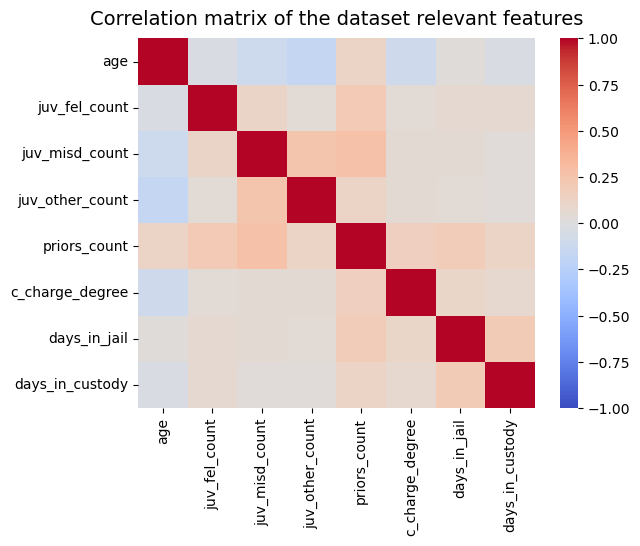

In [72]:
"""
CELL N°2.1.2 : Correlation matrix

@pre:  A pandas.DataFrame `df` containing the dataset
@post: A visualization of the correlation matrix between features.
"""

def show_corr(X) :
    fig = plt.figure()
    plt.title('Correlation matrix of the dataset relevant features', fontsize=14, x=0.5, pad=10)
    corr_matrix = X.corr(method='pearson')
    sns.heatmap(corr_matrix,cmap='coolwarm',vmin=-1,vmax=1)
    fig.savefig("Q2corr.pdf",bbox_inches='tight')
    fig.show()

show_corr(X)

<br>
<font size=5 color=#009999> <b>2.2 Principal Component Analysis</b> <br>
</font>


PCA is often considered as the simplest and most fundamental technique used in dimensionality reduction. Remember that PCA is essentially the rotation of coordinate axes, chosen such that each successful axis captures or preserves as much variance as possible. If the algorithm returns a new system coordinates of the same dimension as the input, we can keep only the axis corresponding to the 3 largest singular values and project data on this coordinates system to perform the visualization.

To vizualize the importance of features, we can extract the PCA loadings. These are indicators of the correlation between components and original features. The value of loadings is contained between -1 and 1. The more the value goes toward those boundaries, the more the feature influences the choice of component.We propose to perform a 2-dimensional PCA and then to add the loadings in vector form to the figure to obtain what is called a biplot.

The biplot visualization function is provided below.

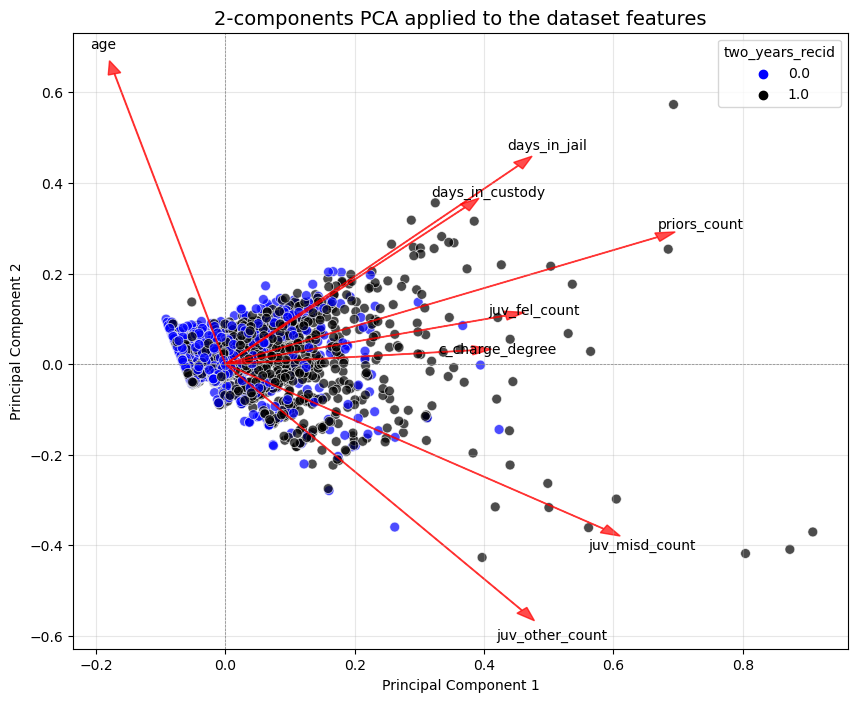

In [73]:
"""
CELL N°2.2.1 : Principal Component Analysis (2D)

@pre:  A pandas.DataFrame `X` containing the dataset and labels `y`
@post: A PCA visualization in 2D where points are colored with respect to true labels `y`
"""


def biplot_visualization(X, y, columns=None):
    """
    Plot a biplot graph: the scaled data after applying a 2D PCA with loadings in vector forms.

    :param pca: PCA object
    :param X: a n by m matrix (or DataFrame), containing the input prior to the PCA transformation
    :param y: a vector of length n containing the target
    :param columns: a list of length m contained the names of the columns
        If not given, X.columns will be used
    """
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)

    columns = (
        columns
        if columns is not None
        else X.columns
        if isinstance(X, pd.DataFrame)
        else [f"Feature {i+1}" for i in range(X.shape[1])]
    )

    # Normalize data for scaling
    X_normalized = X / (X.max(axis=0) - X.min(axis=0))

    df = pd.DataFrame(data=X_normalized, columns=["PC1", "PC2"])

    # Prepare loadings (vector components)
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    loadings_df = pd.DataFrame(loadings, columns=["PC1", "PC2"], index=columns)

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df["PC1"], y=df["PC2"], 
                    hue=y, 
                    palette={0:'blue',1:'black'}, 
                    s=50, alpha=0.7)

    # Add vectors for loadings
    for index, row in loadings_df.iterrows():
        plt.arrow(
            0,
            0,
            row.PC1,
            row.PC2,
            color="red",
            alpha=0.7,
            head_width=0.02,
            head_length=0.03,
        )
        plt.text(
            row.PC1 * 1.1,
            row.PC2 * 1.1,
            index,
            color="black",
            ha="center",
            va="center",
            fontsize=10,
        )

    # Labels and limits
    plt.title("2-components PCA applied to the dataset features", fontsize=14)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
    plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
    plt.grid(alpha=0.3)
    plt.legend(title="two_years_recid", loc="best")
    plt.savefig("Q2pca2.pdf",bbox_inches='tight')
    plt.show()


biplot_visualization(X, y, columns=X.columns)

In the next cell, you are asked to perform a 3 components PCA and plot it using Plotly.
<div class="alert alert-danger">
 Note: On certain versions of Firefox, the 3D scatter function of plotly may have some issues.
</div>

In [74]:
"""
CELL N°2.2.2 : Principal Component Analysis (3D)

@pre:  A pandas.DataFrame `X` containing the dataset and labels `y`
@post: A PCA visualization in 3D where points are colored with respect to true labels `y`
"""

def PCA_3comp_visu(X):

    pca = PCA(n_components=3) # create the scikit-learn estimator, here the PCA with 3 PCs
    X = pca.fit_transform(X) # fit the data, i.e., actually run the estimation of PCs and loadings from dataset X
    X_normalized = X / (X.max(axis=0) - X.min(axis=0))
    X = pd.DataFrame(data=X_normalized, columns=["PC1", "PC2", "PC3"])

    # Create scatter plot
    fig = px.scatter_3d(X, x="PC1", y="PC2", z="PC3", 
                        color=y, 
                        color_continuous_scale=['blue','black'],
                        size=10*np.ones_like(X['PC1']), opacity=1,
                        labels={'color':'two_years_recid'})


    fig.update_layout(
        scene = dict(
            aspectmode = 'data'
        ),
        width=1200, height=800,
        showlegend = True
        )

    fig.show()

PCA_3comp_visu(X)

<div class="alert alert-warning">
<b>[Question 2.2] Principal Component Analysis </b>  <br>
Do all features have the same importance? If no, which features are less important, and why? You can use all other graphs from the visualization part to justify your answer.
</div> 

<br><font size=7 color=#009999> <b>PART 3 - Clustering</b> </font> <br><br>

<font size=4 color=#009999> <b>ABCs of Clustering</b> <br>
Clustering can be defined as the task of *grouping* objects from a set $S$ (here, each row/observation is an object) in such a way that objects assigned to the same group (called cluster) are more **similar** (or less **distant**) with respect to each other (in some sense) than to those assigned to the other groups. Usually, we would like to divide our objects into $K$ groups.

As such, clustering reduces to finding, among all $K$-partitions possible of $S$, the partition $\mathcal{P}$ that minimizes some error criterion $f(\mathcal{P})$. Each object will be assigned a cluster, $C_i$, and each cluster will have its centroid $c_i$ the distance between **any object** in $C_i$ to centroid $c_i$ is **always smaller** that the distance to any other centroid. In other words, each object is assigned to the cluster whose centroid is the closest.


A mathematical formulation of the problem could be the following, $$ \boxed{\min_{(C_1,\dots,C_K) \,\in\, \mathcal{P}}\,f(C_1,\dots,C_K) = \sum_{i = 1}^{K}\,\sum_{x \in C_i}\,\Delta(x,c_i)}$$

where $\Delta(x,c_i)$ denotes the distance between object $x$ and centroid $c_i$.

<br>
<font size=5 color=#009999>
EXAMPLE OF SEPARATING OBJECTS INTO 10 CLUSTERS
</font> <br> <br>

**First**, let us imagine the following 2D dataset.

<img src="Imgs/10-partitions-data.svg" width = "250">

**Then**, a 10-partition is defined by the position of the centroids, one for each cluster. Below, you can observe four examples of (random) centroids localizations (stars).

<img src="Imgs/10-partitions-chose-centroids.svg" width = "1000">

**Next**, the regions are colored based on their closest centroid. Here, we take the distance to be the Euclidean distance.

<img src="Imgs/10-partitions-centroids.svg" width = "1000">

**Finally**, data points (objects) are colored based in the region they are in.

<img src="Imgs/10-partitions-clusters.svg" width = "1000">

<font size=5 color=#009999> <b>3.1 - K-Means</b> <br>
</font>


In [75]:
"""
CELL N°3.1.1 : GROUND TRUTH

@pre:  A pandas.DataFrame `X` containing the dataset and labels `y`
@post: A 80/20 split of your dataset in train and test sets.
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<div class="alert alert-warning">
<b>[Question 3.1] Number of clusters </b>  <br>
    Accounting for all features, what do you think is the ideal number of clusters? What will happen if too many or even too few clusters are chosen?
</div>

Now that your dataset is divided into a train and a test set, use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">KMeans</a> algorithm from `scikit-learn` to apply the clustering on your dataset.

In [76]:
"""
CELL N°3.1.2 : K-Means

@pre:  A split of your dataset: X_train, X_test, y_train, y_test
@post: A split of your dataset in train and test sets.
"""

from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support, silhouette_score

def train_and_predict(model, X_train, X_test):
    """Trains the clustering model on the training data and predict the clusters for both training and test data.

    Parameters:
    model (sklearn or similar clustering model): The clustering algorithm that has a fit_predict method and a predict method.
    X_train (array-like, shape (n_samples, n_features)): The training data to fit the model on.
    X_test (array-like, shape (n_samples, n_features)): The test data to predict the clusters for.

    Returns:
    tuple: A tuple containing two arrays:
        - train_clusters (array): Cluster labels for the training data.
        - test_clusters (array): Cluster labels for the test data.
    """
    train_clusters = model.fit_predict(X_train)
    test_clusters = model.predict(X_test)       
    return train_clusters, test_clusters


def compute_y_pred(model, X_train, X_test, y_train):
    """Compute the predicted labels for the test data based on the clustering model.

    This function assigns a predicted label to each sample in the test set by:
    1. Training the model on the training data using the previous function.
    2. Assigning the majority class from the training labels to each cluster.
    3. Using the cluster assignments from the test data to assign predicted labels.

    Parameters:
    model (sklearn or similar clustering model): The trained clustering model with an `n_clusters` attribute.
    X_train (array-like, shape (n_samples, n_features)): The training data used to fit the model.
    X_test (array-like, shape (n_samples, n_features)): The test data to predict labels for.
    y_train (array-like, shape (n_samples,)): The true labels of the training data.

    Returns:
    np.array: An array of predicted labels for the test data based on the majority class in each cluster.
    """
    mapping = {}
    train_clusters, test_clusters = train_and_predict(model, X_train, X_test)
    df = pd.DataFrame({"cluster": train_clusters, "target": y_train})

    for cluster in range(model.n_clusters):
        majority_class = df[df["cluster"] == cluster]["target"].mode()[0]
        mapping[cluster] = majority_class

    y_pred = [mapping[cluster] for cluster in test_clusters]
    return y_pred


def compute_metrics(model, X_train, y_train, X_test, y_test):
    """Computes various evaluation metrics for the clustering model.

    Parameters:
    model (sklearn or similar clustering model): The trained clustering model with an `n_clusters` attribute.
    X_train (array-like, shape (n_samples, n_features)): The training data used to fit the model.
    X_test (array-like, shape (n_samples, n_features)): The test data to predict labels for.
    y_train (array-like, shape (n_samples,)): The true labels of the training data.
    y_test (array-like, shape (n_samples,)): The true labels of the test data.

    Returns:
    dict: A dictionary containing the computed metrics:
        - "n_clusters": The number of clusters in the model.
        - "Accuracy": The accuracy of the model on the test data.
        - "F1-Score": The F1-score of the model on the test data.
        - "Precision": The precision of the model on the test data.
        - "Recall": The recall of the model on the test data.
        - "Silhouette Score": The silhouette score of the clustering on the test data.
    """

    def compute_purity_entropy(clusters, y_test, n_clusters):
        cluster_classes = pd.DataFrame({'cluster': clusters, 'true_class': y_test})
        total_points = len(y_test)
        purity = 0
        entropy = 0

        for cluster in range(n_clusters):
            cluster_points = cluster_classes[cluster_classes['cluster'] == cluster]
            n_points = len(cluster_points)
            if n_points == 0:
                continue  # Avoid division by zero

            class_counts = cluster_points['true_class'].value_counts()
            max_class_count = class_counts.max()
            cluster_purity = max_class_count / n_points
            purity += cluster_purity * n_points / total_points

            cluster_entropy = 0
            for count in class_counts:
                p_ij = count / n_points
                cluster_entropy -= p_ij * np.log2(p_ij)
            entropy += cluster_entropy * n_points / total_points

        return purity, entropy
    
    y_pred = compute_y_pred(model, X_train, X_test, y_train)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred,average='weighted')
    precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    sil_score = silhouette_score(X_test, model.predict(X_test))
    test_clusters = model.predict(X_test)
    purity, entropy = compute_purity_entropy(test_clusters, y_test, model.n_clusters)
    return {
        "n_clusters": model.n_clusters,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall,
        "Silhouette Score": sil_score,
        "Purity": purity,
        "Entropy": entropy,
    }


kmeans = KMeans(n_clusters=2, random_state=random_seed)
results = compute_metrics(kmeans, X_train, y_train, X_test, y_test)
print(results)

{'n_clusters': 2, 'Accuracy': 0.6029684601113172, 'F1-Score': 0.5258595533074889, 'Precision': 0.65491779112698, 'Recall': 0.6029684601113172, 'Silhouette Score': 0.5395139938513052, 'Purity': 0.6029684601113172, 'Entropy': 0.9624899400280235}


<font size=5 color=#009999> <b>3.2 - Results Analysis</b> <br>
</font>

In this section, we adress the difficult task of evaluating the performance of the clustering algorithm.

<font size=3 color=#009999> <b>3.2.1 - Quality of the clustering</b> <br>
</font>
The silhouette score is a measure of how close each point in one cluster is to points in the neighboring clusters. The [mean silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) is an average of the silhouette score for each point and provides a way to measure the quality of the clustering.

The best value is 1 and the worst value is -1.

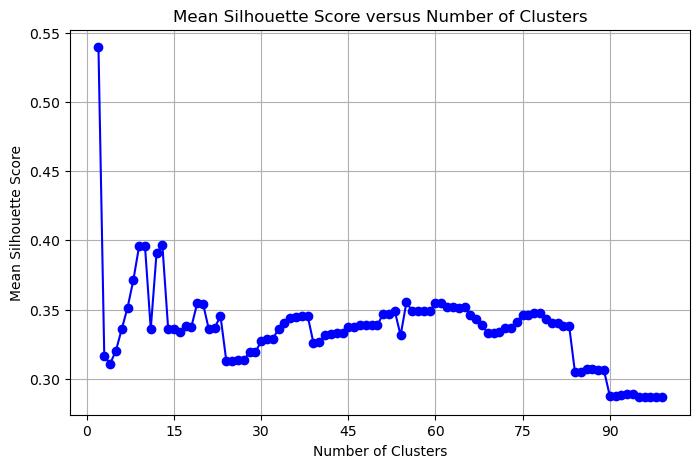

In [77]:
"""
CELL N°3.2.1 : Silhouette Score

@pre:  A split of your dataset: X_train, X_test, y_train, y_test
@post: A "Mean Silhouette Score versus Number of Clusters" plot
"""

silhouette_scores = []

for k in range(2, 100) :
    model = KMeans(n_clusters=k, random_state=random_seed)
    results = compute_metrics(model, X_train, y_train, X_test, y_test)
    silhouette_scores.append(results['Silhouette Score'])

plt.figure(figsize=(8, 5))
plt.plot(range(2, 100), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Mean Silhouette Score versus Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Mean Silhouette Score")
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid() 

plt.show()

<br>
<font size=5 color=#009999> <b>3.2.2 - Purity and entropy of a clustering</b> <br>
</font>

### Purity

Purity measures how well a cluster contains points from a single class. A cluster with high purity mostly contains points from one class.

**Example:** Imagine you are grouping fruits based on their shape, but you also have information about their color. If a group contains mostly red apples, that group has high purity. However, if you find a few green apples or pears in the group, the purity decreases. In this case, high purity means the majority of fruits share both shape and color consistency.

Formula:
$$
\text{Purity } = \frac{1}{N} \sum_{i = 1}^k \max_j n_{i,j}
$$
where:
- $N = $ total number of points,
- $k = $ number of clusters,
- $n_{i,j} = $​ number of points from class $j$ in cluster $i$,
- $\max_j n_{i,j} = $ number of points from the most common class in cluster $i$.


### Entropy

Entropy measures how mixed the classes are within a cluster. Low entropy means most points in a cluster belong to the same class. High entropy means points are more evenly distributed across different classes.

**Example:** Consider a fruit basket that is mostly filled with red apples, with only a few bananas and oranges. Since the basket is dominated by one type of fruit, it has low entropy. In contrast, if the basket contains an equal mix of apples, bananas, and oranges, the distribution is more random, resulting in high entropy. This even distribution means it is harder to predict the dominant fruit just by looking at the basket.

***Formula for a single cluster:***
$$
E_i = -\sum_{j=1}^{C} p_{ij} \log_2(p_{ij})
$$

Where:

- $C = $ number of classes,
- $p_{i,j} = $ proportion of points from class jj in cluster ii.

The overall entropy is the weighted average across all clusters:

$$
\text{Entropy} = \frac{1}{N} \sum_{i=1}^{k} n_i \cdot E_i
$$

Where $n_i$​ is the number of points in cluster $i$.

A good clustering aims for both high purity (most points in a cluster belong to one class) and low entropy (each cluster contains little class mixing).
    
<div class="alert alert-danger">
 If this makes it easier for you to implement purity and entropy, you can modify the previously defined function `compute_metrics` to also return in the results dictionary the purity, the entropy or any other metric that you may want to use later on.
</div>
<div class="alert alert-danger">
 Compared to the silhouette score which is computed using only the features, purity and entropy are metrics computed using the true label `y`. Do not forget to compute these metrics on a test set.
</div>

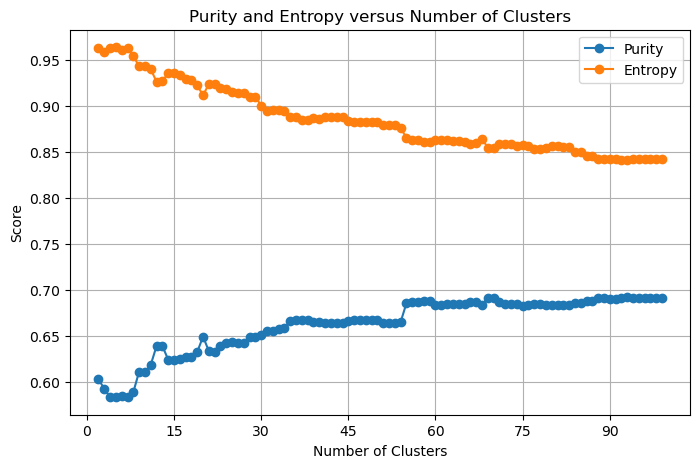

In [78]:
"""
CELL N°3.2.2 : Purity and Entropy

@pre:  A split of your dataset: X_train, X_test, y_train, y_test
@post: A "Purity/Entropy versus Number of Clusters" plot. There should be two curves, one for the purity and one for the entropy.
"""

purity_scores = []
entropy_scores = []


for n_clusters in range(2, 100):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed)
    metrics = compute_metrics(kmeans, X_train, y_train, X_test, y_test)
    purity_scores.append(metrics["Purity"])
    entropy_scores.append(metrics["Entropy"])


plt.figure(figsize=(8, 5))
plt.plot(range(2, 100), purity_scores, label="Purity", marker="o")
plt.plot(range(2, 100), entropy_scores, label="Entropy", marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Purity and Entropy versus Number of Clusters")
plt.legend()
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid()
plt.show()

<div class="alert alert-warning">
<b>[Question 3.2] Quality of the clustering </b>  <br>
    You considered three different measures for the quality of the clustering: the first one is the silhouette score and is oblivious to the true labels: it is a truly unsupervised metric. The second and third metric use the true label to assess the quality of the clustering. Based on this observation,
    
1. Comment on the evolution of each metric according to the number of clusters.
2. Comment on what do you now think is the ideal number of clusters ?
    
</div>

<br><font size=7 color=#009999> <b>PART 4 - Fairness metrics</b> </font> <br><br>

Congratulations for reaching this far ! So far, you have thoroughly analyzed a sensitive dataset, you cleaned it and focused on what you believe were useful features for predicting recidivism. You then used the K-Means algorithm to have your own recidivism predictor.

Because of the sensitivity of the dataset and its potential negative impact on certain parts of the population, you should now assess its fairness with respect to each gender and race group.

<br>
<font size=5 color=#009999> <b>4.1 False Positive Rate</b> <br>
</font>

The false positive rate (FPR) is a performance metric used to evaluate the accuracy of a machine learning model, particularly in binary classification tasks. It refers to the proportion of actual negative instances (people that did not recidivate) that are incorrectly classified as positive. A lower FPR indicates that the model is better at identifying negative cases.

A fair model would have the same FPR across all groups.

<div class="alert alert-danger">
 As for the purity and entropy metrics, the false positive rate metric uses the true labels, you should therefore make a train/test split before hand.
</div>

[0 1 2 ... 1 2 1]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  Tr

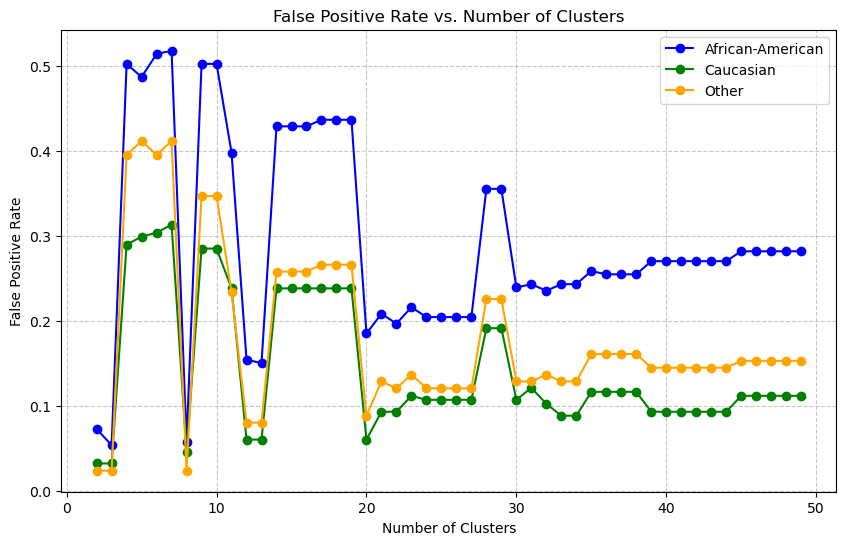

In [79]:

"""
CELL N°4.1 False Positive Rate

@pre:  A split of your dataset: X_train, X_test, y_train, y_test
@post: A "False Positive Rate vs Number of Clusters" plot for each group
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

# Because the dataset is imbalanced, we will repartition our dataset into three race groups: African-American, Caucasian and Other.

# Doing so, you can now use X_test[group_val == i] to get the test points with race i.



def FPR(X, y) : 
    # Example placeholders for your dataset variables
    # Replace these with your actual dataset and features

    random_seed = 42

    # Step 1: Repartition dataset into racial groups

    group_labels = np.where(race == 0, 0, np.where(race == 1, 1, 2))
    # Step 2: Train/test split
    X_train, X_test, y_train, y_test, group_train, group_test = train_test_split(
        X, y, group_labels, test_size=0.2, random_state=random_seed
    )
    print(group_test)

    # Step 3: Define FPR computation function
    def compute_fpr(y_true, y_pred):
        """Compute the false positive rate."""
        cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
        if cm.size == 4:  # Cas normal
            tn, fp, fn, tp = cm.ravel()
        else:  # Gestion des cas avec des classes manquantes
            tn, fp, fn, tp = 0, 0, 0, 0
            if cm.shape == (1, 2):  # Une seule ligne (tous les labels vrais sont 0)
                tn, fp = cm[0]
            elif cm.shape == (2, 1):  # Une seule colonne (tous les labels prédits sont 0)
                fn, tp = cm[:, 0]
        return fp / (fp + tn) if (fp + tn) > 0 else 0


    # Step 4: Range of clusters
    num_clusters = range(2, 50)
    fpr_results = {0: [], 1: [], 2: []}  # For African-American, Caucasian, Other

    # Step 5: K-Means clustering and FPR calculation for each group
    for k in num_clusters:
        y_pred = compute_y_pred(KMeans(n_clusters=k, random_state=random_seed), X_train, X_test, y_train)
        # Compute FPR for each group
        for group in [0, 1, 2]:
            group_mask = group_test == group
            

            print(group_mask)
            y_test = np.array(y_test)
            y_pred = np.array(y_pred)
            y_true_group = y_test[group_mask]
            y_pred_group = y_pred[group_mask]
            
            

            fpr = compute_fpr(y_true_group, y_pred_group)
            fpr_results[group].append(fpr)

    # Step 6: Plot results
    plt.figure(figsize=(10, 6))
    colors = ['blue', 'green', 'orange']
    labels = ['African-American', 'Caucasian', 'Other']

    for group, color, label in zip(fpr_results.keys(), colors, labels):
        plt.plot(num_clusters, fpr_results[group], marker='o', color=color, label=label)

    plt.xlabel("Number of Clusters")
    plt.ylabel("False Positive Rate")
    plt.title("False Positive Rate vs. Number of Clusters")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
    return X_train , X_test , y_train , y_test , group_train , group_test 

X_train , X_test , y_train , y_test , group_train , group_test   = FPR(X, y) 


<br>
<font size=5 color=#009999> <b>4.2 Demographic Parity</b> <br>
</font>
Demographic parity is a fairness metric aimed at ensuring that a machine learning model’s predictions do not depend on membership in a sensitive group. Specifically, demographic parity is achieved when the likelihood of a prediction is independent of sensitive group membership. In binary classification, demographic parity requires equal selection rates across groups.

In our case, perfect demographic parity means that there is the exact same proportion of “bail denied” in each race group. A fair model would have the same Demographic Parity value across all groups.

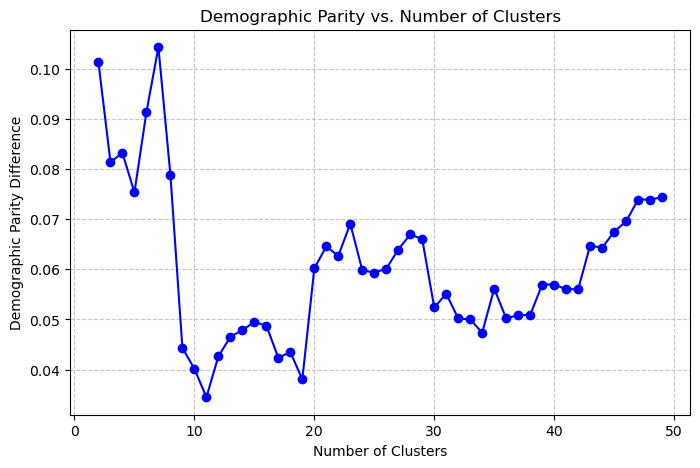

In [80]:


# Fonction pour calculer la parité démographique
def compute_demographic_parity_R(X_train , X_test , y_train , y_test , group_train , group_test):
    def compute_demographic_parity(y_pred, group_labels):
        """Calcul de la parité démographique pour chaque groupe."""
        unique_groups = np.unique(group_labels)
        demographic_parity = {}

        for group in unique_groups:
            group_mask = group_labels == group

        
            group_pred = y_pred[group_mask]
            positive_rate = np.mean(group_pred == 1)  

            demographic_parity[group] = positive_rate

        return demographic_parity

    # Paramètres
    cluster_range = range(2, 50)  
    demographic_parity_diff = [] 

    for n_clusters in cluster_range:
        # Étape 1 : Appliquer K-Means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_train)

        cluster_labels = kmeans.predict(X_train)

        y_pred = cluster_labels % 2

        dp = compute_demographic_parity(y_pred, group_train)

        # Étape 4 : Calcul de la différence maximale entre les groupes
        max_diff = max(dp.values()) - min(dp.values())
        demographic_parity_diff.append(max_diff)


    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, demographic_parity_diff, marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Demographic Parity Difference")
    plt.title("Demographic Parity vs. Number of Clusters")
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

demographic_parity_diff = compute_demographic_parity_R(X_train , X_test , y_train , y_test , group_train , group_test)


<div class="alert alert-warning">
<b>[Question 4.1] Fairness of your model </b>  <br>
    You considered two different measures for the fairness of your model and checked for various variants of your algorithm (number of clusters) the value of these fairness metrics.

Is your algorithm unfair ? If yes, which ethnic group is penalized by the unfairness of your model ?
    
</div>

<div class="alert alert-warning">
<b>[Question 4.2] Presence of the sensitive features in the dataset [BONUS]</b> <br> 
In Cell 1.5, you removed the sensitive features from your dataset before building your algorithm. Yet, you may have noticed unfairness in your algorithm.

1. Provide reasons why it is not necessarily enough to remove sensitive features from your dataset if you want to have fair predictions.
2. Compute FPR and Demographic Parity for your algorithm when trained on the full dataset. Is the fairness of your classifier worse ?
</div>

[0 1 2 ... 1 2 1]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  True ... False  True False]
[ True False False ... False False False]
[False  True False ...  True False  True]
[False False  Tr

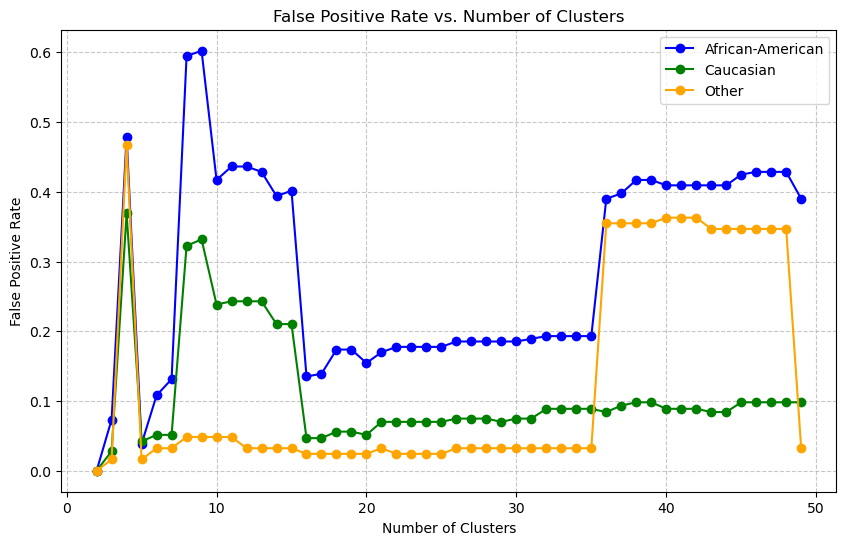

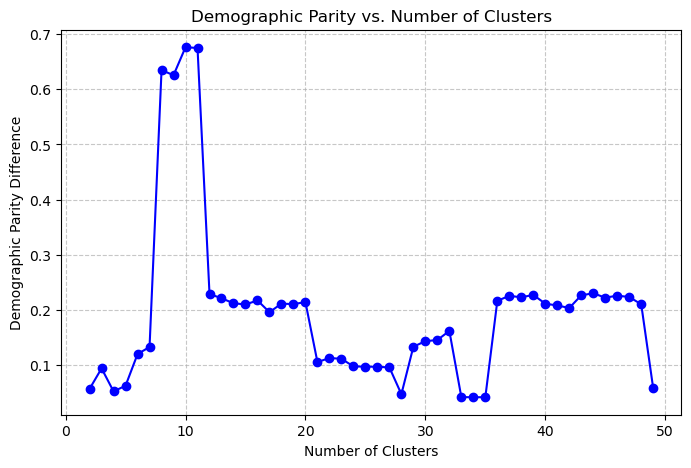

In [81]:
# Empty cell for the BONUS question.

X_train , X_test , y_train , y_test , group_train , group_test   = FPR(X2, y) 
compute_demographic_parity_R(X_train , X_test , y_train , y_test , group_train , group_test)

<br><font size=7 color=#009999> <b>PART 5 - Visualization </b> </font> <br><br>

<font size=5 color=#009999> <b>5.1 Visualize your results</b> <br>
</font>
In the last cell, you can create the figure of your choice to visualize your results. You can be as creative as you want as long as you only use one figure (with potentially more than one plot).

You will be evaluated on the clarity of your figure. You should ask yourself the following question while creating it: "Is the message I am trying to convey clear enough so that a student from another group can take a quick look and understand it directly ?" If the answer is positive, it's probably a great plot !

[1.06904166 1.07073641 1.16388617 1.11226171 1.21759732 1.05923539
 1.09852854 1.06757323]


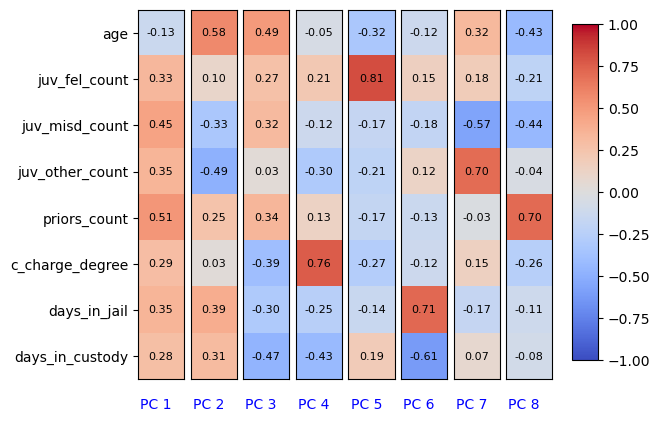

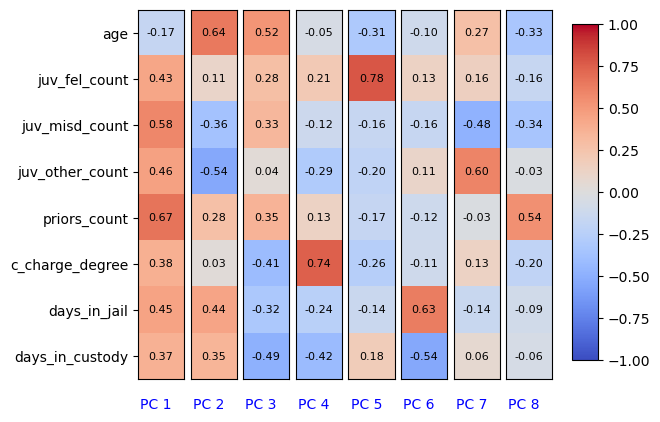

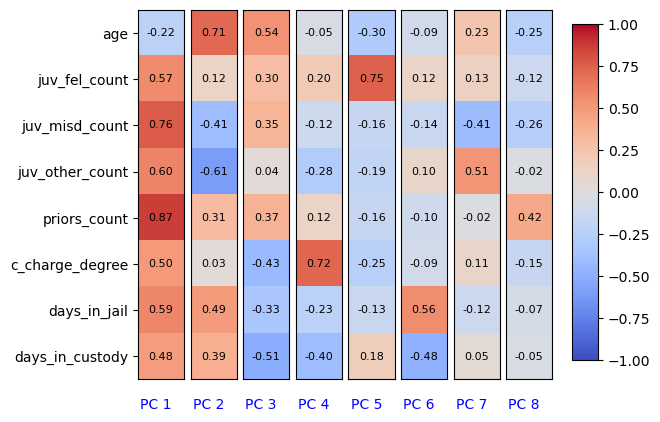

In [82]:
def get_components_importance(X):
    """
    Does a PCA with n_components = n_features from the dataset X
    Shows a visualization of the PCs coordinates in term of features :
    displays n vertical colorbars, each representing a PC, with each row colored following the feature "composition" in the PC
    """

    n = len(X.columns)
    pca = PCA(n_components=n)
    pca.fit_transform(X)
    PCs = pca.components_

    # Transformation on PCs 
    scaled_PCs = (pca.components_.T*pca.explained_variance_).T

    # Loadings (correlation)
    loadings = (pca.components_.T * np.sqrt(pca.explained_variance_)).T

    # Crossed sums in the arrays
    print(np.sum(scaled_PCs**2,axis=0))   # Squared sum of the scaled PC coefficients for each feature

    def create_figure(coeffs):
        """
        coeffs is a n by n array, where the i-th element is the i-th PC, and the j-th element of the i-th element is a coeff between PC[i] and feature[j]
        """
        # Create figure, one subplot for each PC
        fig, axes = plt.subplots(1, n,
                                # no graduation ticks for clarity
                                subplot_kw={'xticks': [], 'yticks': []},
                                # space between subplots
                                gridspec_kw=dict(hspace=0, wspace=0.1))
            
        # Add space for colorbar
        fig.subplots_adjust(right=0.85, left=0.2)  # Increase left margin for labels
        cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
        
        # Plot each PC
        for i, ax in enumerate(axes.flat):
            im = ax.imshow(coeffs[i].reshape(n,1), cmap='coolwarm', vmin=-1, vmax=1)
            ax.text(0.05, -0.08, 'PC ' + str(i+1), transform=ax.transAxes, color='blue')
            for j in range(n):
                ax.text(0,j,"{:.2f}".format(coeffs[i][j]), ha="center", va="center", fontdict={'fontsize':8})
            
            # Show ticks and colorbar only for the leftmost subplot
            if i == 0:
                feature_names = X.columns
                ax.set_yticks(range(len(feature_names)))
                ax.set_yticklabels(feature_names)
                ax.tick_params(left=True)
                fig.colorbar(im, cax=cbar_ax)

        return fig

    fig1 = create_figure(PCs)
    fig2 = create_figure(loadings)
    fig3 = create_figure(scaled_PCs)

    fig1.savefig("PCA.pdf",bbox_inches='tight')
    fig2.savefig("PCA-correlation.pdf",bbox_inches='tight')
    fig3.savefig("PCA-scaled.pdf",bbox_inches='tight')


get_components_importance(X)